# Linear Regression — From Scratch

In this notebook, we implement the **Linear Regression** algorithm entirely from scratch using **NumPy**, without relying on scikit-learn.

We will:

- Generate a synthetic dataset  
- Implement Linear Regression step-by-step  
- Define the prediction function  
- Compute the cost function (MSE)  
- Implement Gradient Descent  
- Train the model  
- Visualize the regression line  
- Analyze results 

## What is Linear Regression?

Linear Regression is one of the simplest and most fundamental algorithms in Machine Learning and statistics.  
Its goal is to find the best-fitting **straight line** that models the relationship between:

- **Input feature(s)** → \( X \)  
- **Target values** → \( y \)

The model is defined as:

$$
\hat{y} = \theta_0 + \theta_1 X
$$

Where:

- $\theta_0$ → bias (intercept)
- $\theta_1$ → weight (slope)

The objective is to find the values of $\theta_0$ and $\theta_1$ that minimize the prediction error.


---

## Steps

1. Add the bias term  
2. Define the prediction function  
3. Compute the cost function (Mean Squared Error)  
4. Compute gradients  
5. Apply Gradient Descent to update parameters  
6. Train the model  
7. Visualize the regression line  
8. Evaluate and interpret results  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Create a Synthetic Dataset

In [5]:
np.random.seed(42)

# True relation: y = 4 + 3x + noise
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias column
X_b = np.c_[np.ones((100, 1)), X]

X[:5], y[:5]


(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728]]),
 array([[6.33428778],
        [9.40527849],
        [8.48372443],
        [5.60438199],
        [4.71643995]]))

## 2. Linear Regression Functions (Prediction, Cost & Gradient Descent)


In [6]:
def predict(X, theta):
    return X @ theta


def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost


def gradient_descent(X, y, theta, lr=0.1, epochs=1000):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        gradients = (1/m) * X.T @ (predict(X, theta) - y)
        theta = theta - lr * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [7]:
theta_init = np.random.randn(2, 1)
theta_final, cost_history = gradient_descent(X_b, y, theta_init)

theta_final


array([[4.21509609],
       [2.77011344]])

In [8]:
theta_init = np.random.randn(2, 1)
theta_final, cost_history = gradient_descent(X_b, y, theta_init)

theta_final


array([[4.21509607],
       [2.77011347]])

## 3. Data Visualization

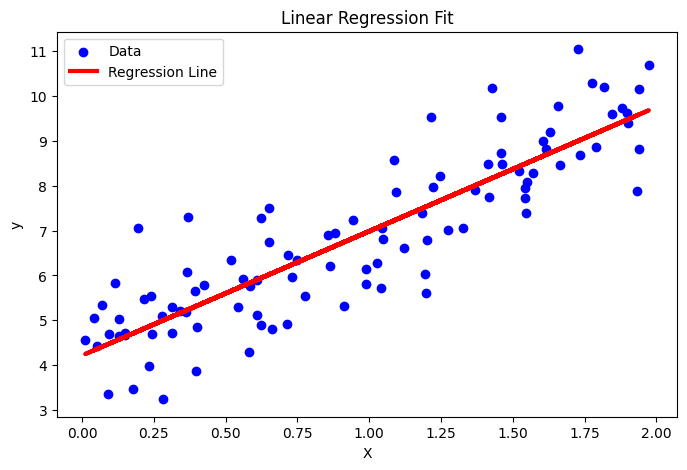

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, predict(X_b, theta_final), color="red", linewidth=3, label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


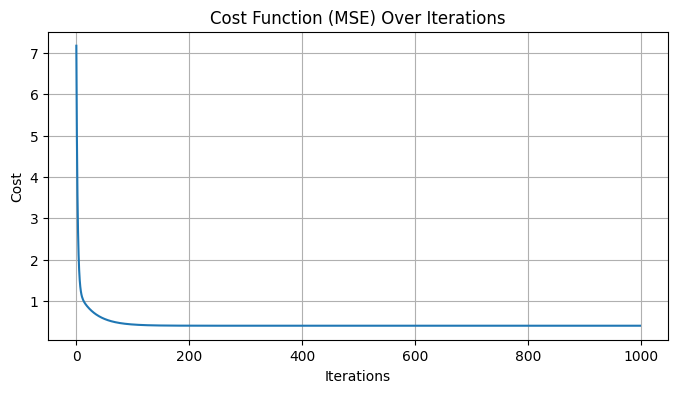

In [10]:
plt.figure(figsize=(8,4))
plt.plot(cost_history)
plt.title("Cost Function (MSE) Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


## 4. Performance Evaluation and Parameter Interpretation

- Final parameters:
  - $\theta_0$ (bias): shown above  
  - $\theta_1$ (weight): shown above  
- The regression line fits the data well  
- The cost curve decreases smoothly → Gradient Descent is working
